# Demand Forecasting And Optimization Project 

In [1]:
import pandas as pd 

In [2]:
train = pd.read_csv("train.csv")
store = pd.read_csv("store.csv")

C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\2005772569.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


In [3]:
df = pd.merge(train, store, how="left", on="Store")


In [4]:
print("Train shape:", train.shape)
print("Store shape:", store.shape)
print("Merged shape:", df.shape)
df.head()

Train shape: (1017209, 9)
Store shape: (1115, 10)
Merged shape: (1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
print(df.info())  ##### checked columns 


print(df.isnull().sum()) #### checked nnull values 


print(df.describe())


df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
425375,231,7,2014-06-15,0,0,0,0,0,0,d,c,3840.0,10.0,2008.0,1,39.0,2010.0,"Feb,May,Aug,Nov"
1008305,16,2,2013-01-08,8370,919,1,1,0,0,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
768979,415,7,2013-08-11,0,0,0,0,0,0,d,c,6910.0,4.0,2005.0,0,NaN,NaN,NaN
529864,1025,5,2014-03-14,6935,791,1,0,0,0,a,a,720.0,11.0,2009.0,0,NaN,NaN,NaN
263481,1098,3,2014-12-03,7268,896,1,1,0,0,a,a,1830.0,11.0,2004.0,0,NaN,NaN,NaN


# Basic EDA 

### which stores have the highest sales?

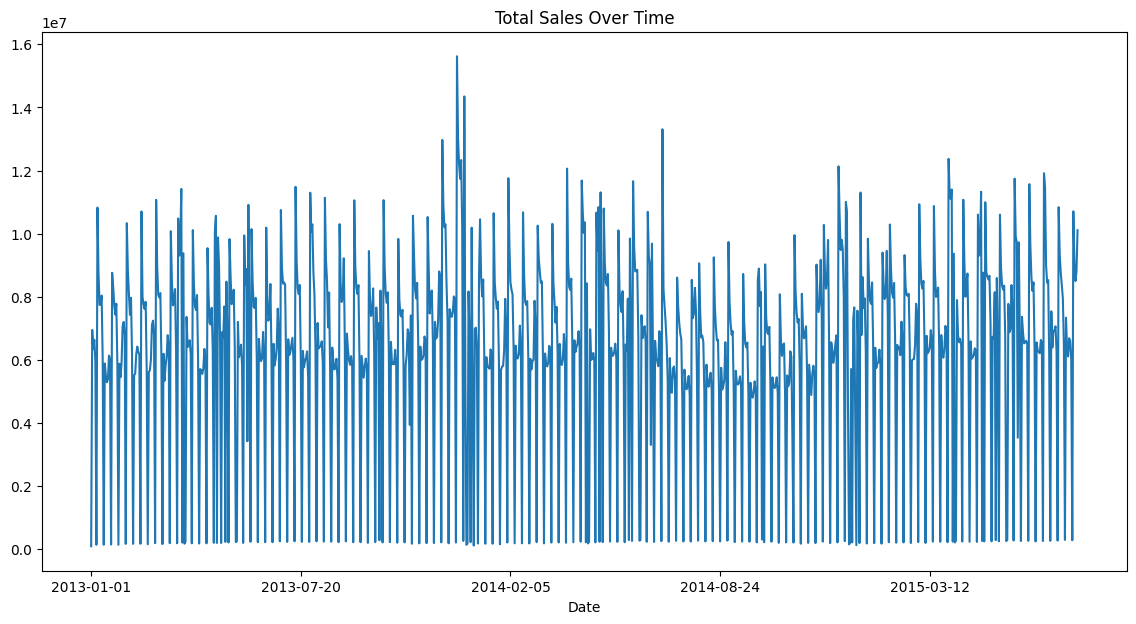

In [6]:
import matplotlib.pyplot as plt 

df. groupby("Date")["Sales"].sum().plot(figsize=(14, 7), title="Total Sales Over Time")
plt.show()

### Promo vs Non-Promo sales 

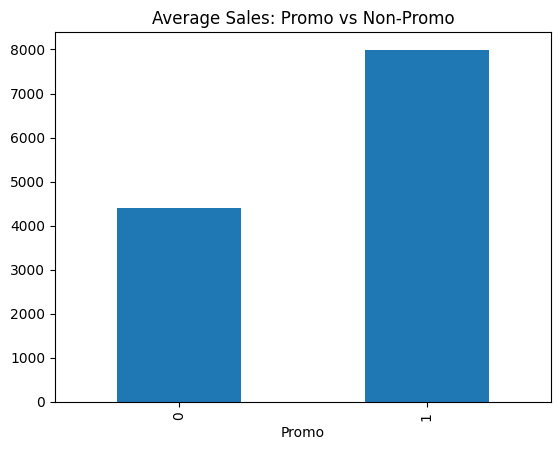

In [7]:
df.groupby("Promo")["Sales"].mean().plot(kind="bar", title="Average Sales: Promo vs Non-Promo")
plt.show()

### Promo vs Non-Promo sales by Store Type


C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\1278071706.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Promo", y="Sales", hue="StoreType", ci=None)


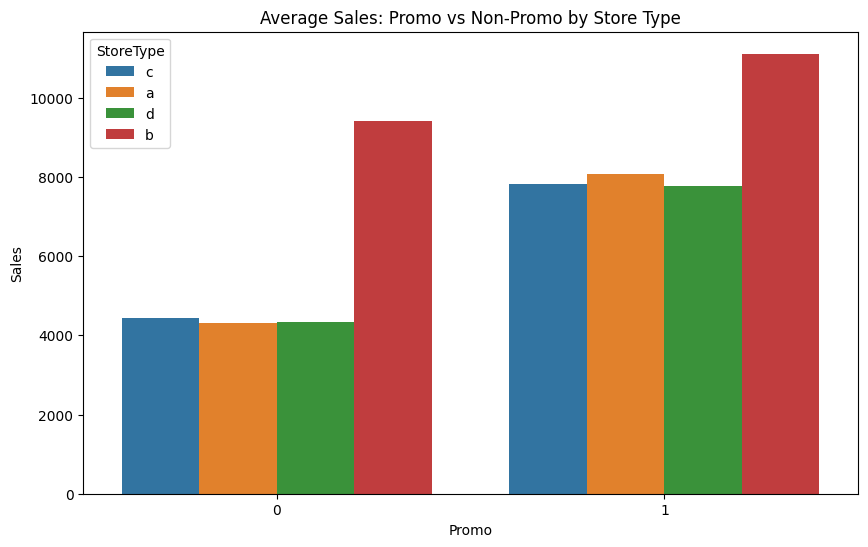

In [8]:
import seaborn as sns 

plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Promo", y="Sales", hue="StoreType", ci=None)
plt.title("Average Sales: Promo vs Non-Promo by Store Type")
plt.show()



###  Promo vs Non-Promo sales by Assortment

C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\2969305051.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Promo", y="Sales", hue="Assortment", ci=None)


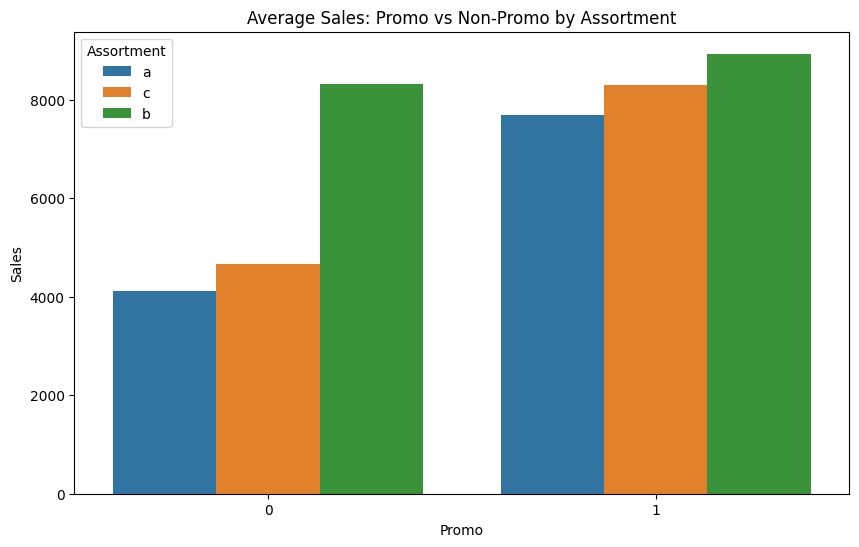

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Promo", y="Sales", hue="Assortment", ci=None)
plt.title("Average Sales: Promo vs Non-Promo by Assortment")
plt.show()
    

### State Holiday Sales Impact

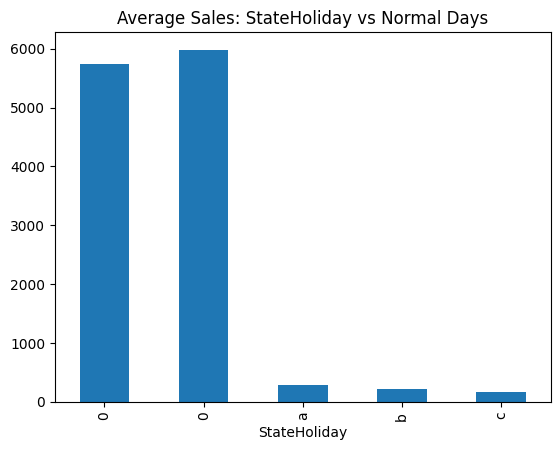

In [10]:
df.groupby("StateHoliday")["Sales"].mean().plot(kind="bar", title="Average Sales: StateHoliday vs Normal Days")
plt.show()

### State Holiday impact with Day Of Week

C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\948827325.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="StateHoliday", y="Sales", hue="DayOfWeek", ci=None)


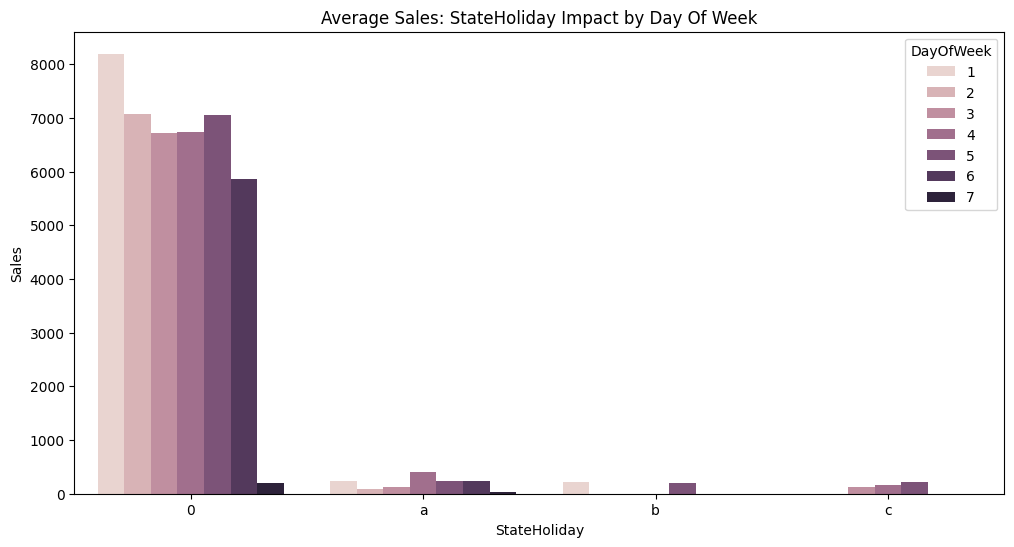

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="StateHoliday", y="Sales", hue="DayOfWeek", ci=None)
plt.title("Average Sales: StateHoliday Impact by Day Of Week")
plt.show()

### StateHoliday + Promo effect

C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\2290802600.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="StateHoliday", y="Sales", hue="Promo", ci=None)


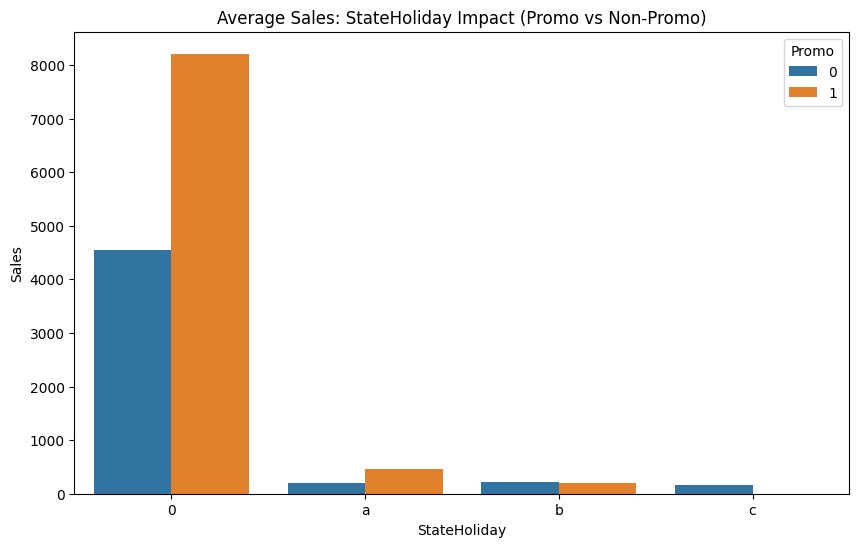

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="StateHoliday", y="Sales", hue="Promo", ci=None)
plt.title("Average Sales: StateHoliday Impact (Promo vs Non-Promo)")
plt.show()

### Competition Impact 

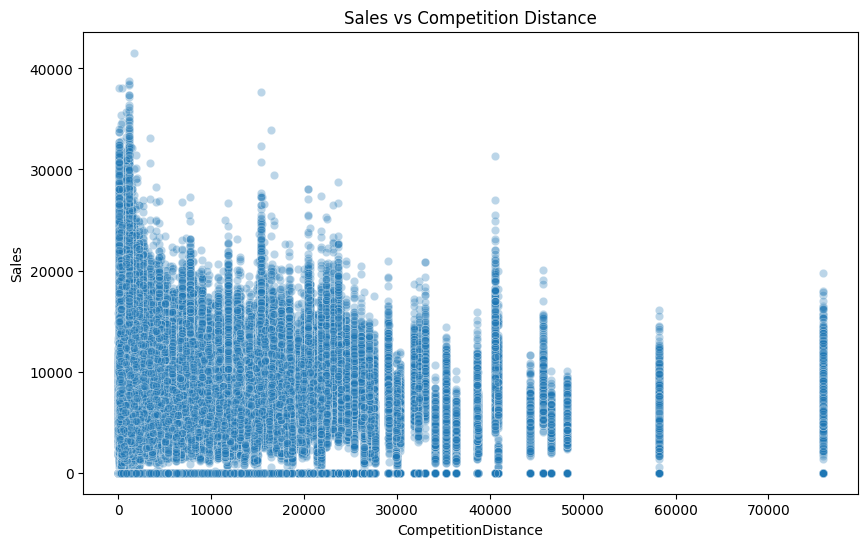

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="CompetitionDistance", y="Sales", alpha=0.3)
plt.title("Sales vs Competition Distance")
plt.show()

### Customers vs Sales

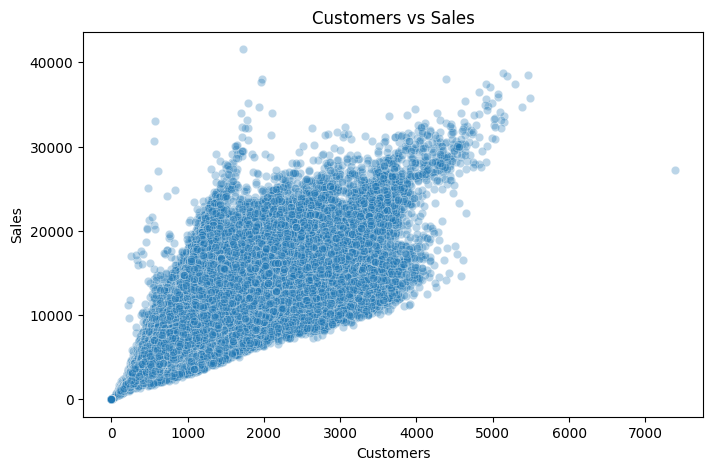

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Customers", y="Sales", alpha=0.3)
plt.title("Customers vs Sales")
plt.show()

# Data Cleaning & Feature Engineering 

In [15]:
import pandas as pd 
import numpy as np

In [16]:
df["Date"] = pd.to_datetime(df["Date"]) ### converting date

In [17]:
df.fillna({"CompetitionDistance": df["CompetitionDistance"].max()}, inplace=True) ### filling with large values 


In [18]:
#### competition open dates filling with current dates 
df["CompetitionOpenSinceMonth"] = df["CompetitionOpenSinceMonth"].fillna(df["Date"].dt.month)
df["CompetitionOpenSinceYear"]  = df["CompetitionOpenSinceYear"].fillna(df["Date"].dt.year)


In [19]:
##### Promo 2 since week  filling with defaults 
df["Promo2SinceWeek"].fillna(0, inplace=True)
df["Promo2SinceWeek"].fillna(0, inplace=True)

C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\2282435142.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Promo2SinceWeek"].fillna(0, inplace=True)
C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\2282435142.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [20]:
### promo2 since year 
df["Promo2SinceYear"] = df["Promo2SinceYear"].fillna(df["Date"].dt.year)

In [21]:
#### promo interval 
df["PromoInterval"] = df["PromoInterval"].fillna("None")

# Feature Engineering 

In [23]:
# extracting year, month, day, week, dayofweek 
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["WeekOfYear"] = df["Date"].dt.isocalendar().week.astype(int)
df["DayOfWeek"] = df["Date"].dt.dayofweek ## monday=0, sunday=6

In [27]:
#### weekend flag 
df["IsWeekend"] = df["DayOfWeek"].isin([5, 6]).astype(int)

### whether store is in promo period 
df["IsPromo2"] = (df["PromoInterval"] != "None").astype(int)

### competition open flag 
df["CompetitionOpen"] = (
    (df["Year"] > df["CompetitionOpenSinceYear"])|
    ((df["Year"] == df["CompetitionOpenSinceYear"]) & (df["Month"] >= df["CompetitionOpenSinceMonth"]))
).astype(int)


#### promo2 active flag (if year >= promo2sinceyear and week >= promo2since week)
df["Promo2Active"] = (
    (df["Year"] > df["Promo2SinceYear"]) |
    ((df["Year"] == df["Promo2SinceYear"]) & (df["WeekOfYear"] >= df["Promo2SinceWeek"]))
).astype(int)
    

# EDA

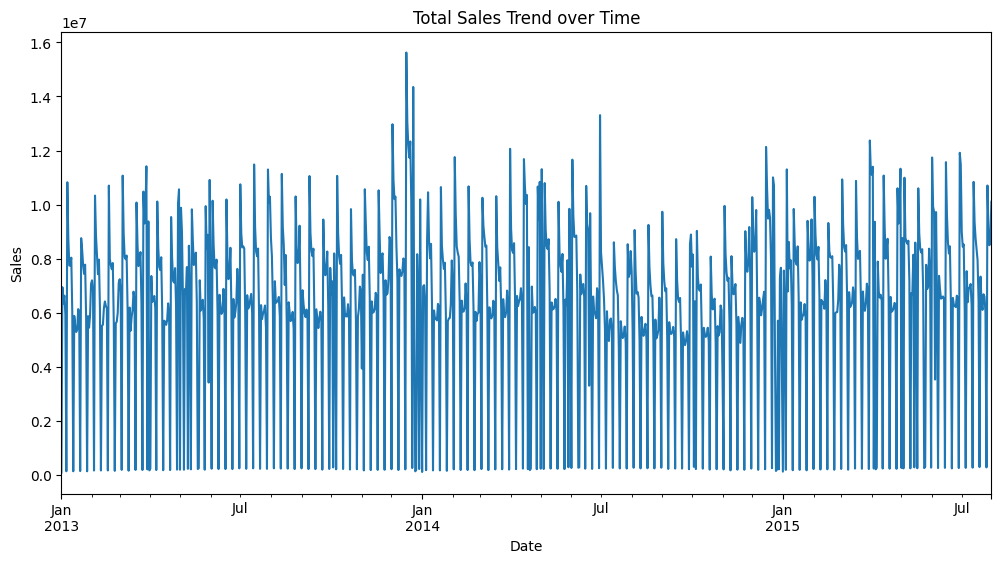

In [28]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6))
df.groupby("Date")["Sales"].sum().plot()
plt.title("Total Sales Trend over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()  #### sales over time 

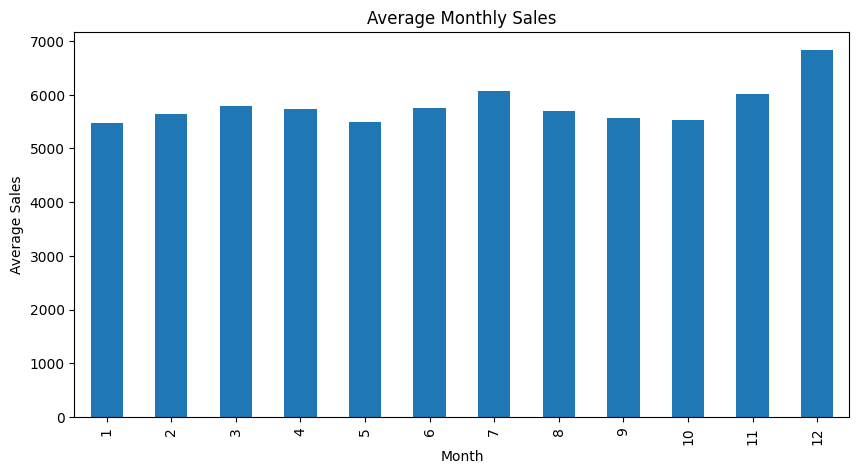

In [29]:
plt.figure(figsize=(10,5))
df.groupby("Month")["Sales"].mean().plot(kind="bar")
plt.title("Average Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()  ##### monthly sales trend 

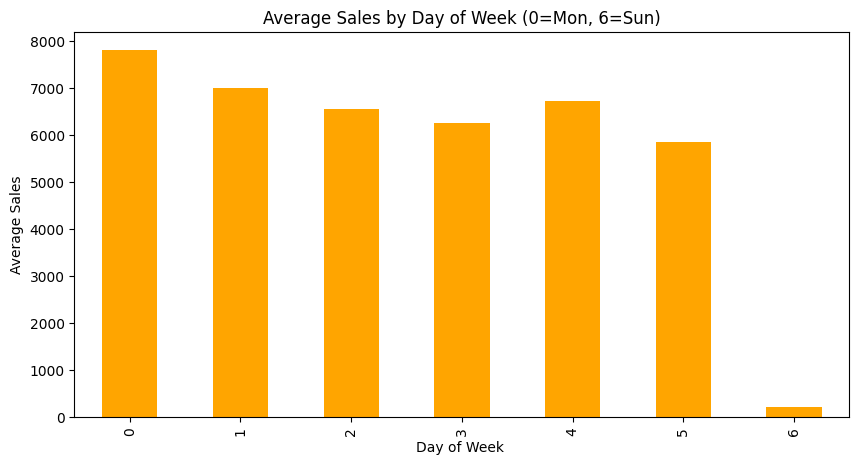

In [34]:
plt.figure(figsize=(10,5))
df.groupby("DayOfWeek")["Sales"].mean().plot(kind="bar", color="orange")
plt.title("Average Sales by Day of Week (0=Mon, 6=Sun)")
plt.xlabel("Day of Week ")
plt.ylabel("Average Sales")
plt.show() #### day of week sales trend 

# Promo vs Non-Promo impact analysis 

C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\495108851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Promo", y="Sales", data=df, estimator="mean", errorbar=None, palette="coolwarm")


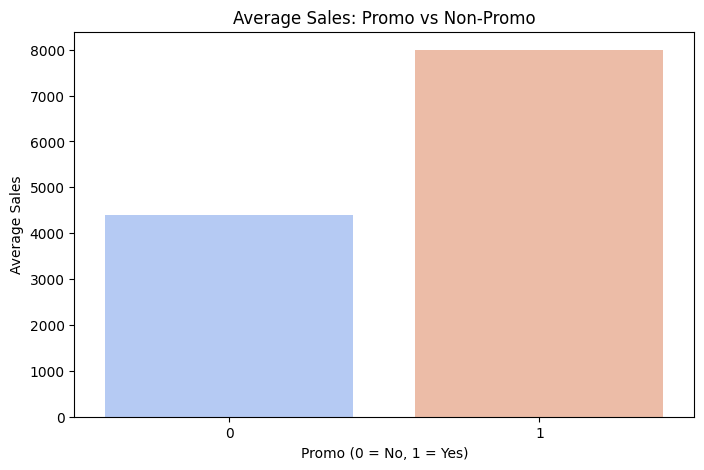

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x="Promo", y="Sales", data=df, estimator="mean", errorbar=None, palette="coolwarm")
plt.title("Average Sales: Promo vs Non-Promo")
plt.xlabel("Promo (0 = No, 1 = Yes)")
plt.ylabel("Average Sales")
plt.show() ### sales distribution: promo vs non- promo 

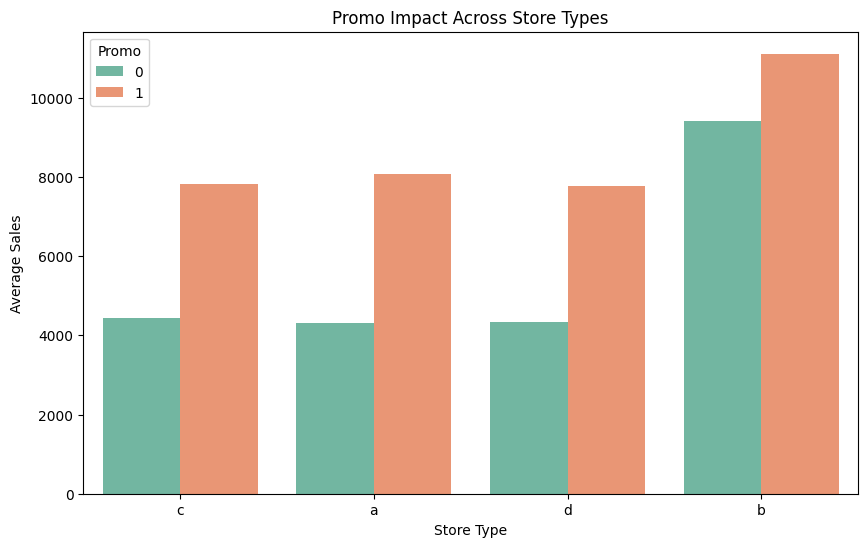

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x="StoreType", y="Sales", hue="Promo", data=df, estimator="mean", errorbar=None, palette="Set2")
plt.title("Promo Impact Across Store Types")
plt.xlabel("Store Type")
plt.ylabel("Average Sales")
plt.show() #### promo impact accross store types 


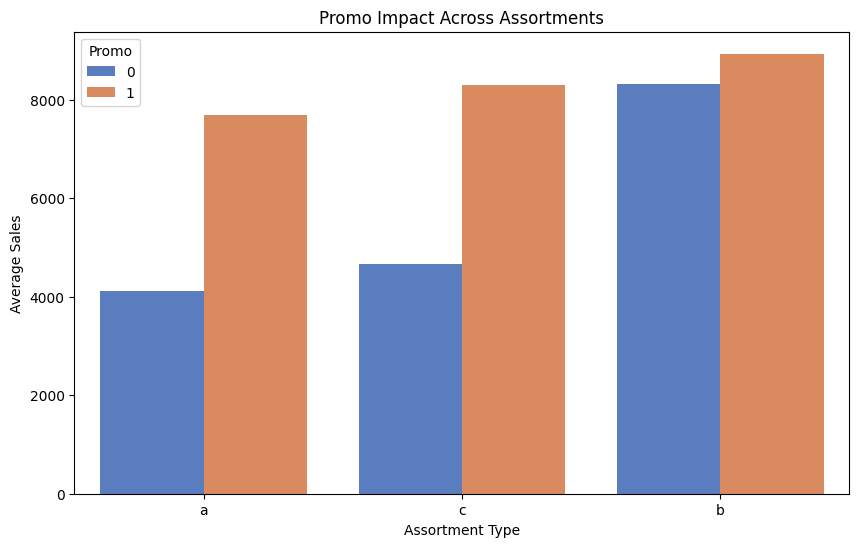

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x="Assortment", y="Sales", hue="Promo", data=df, estimator="mean", errorbar=None, palette="muted")
plt.title("Promo Impact Across Assortments")
plt.xlabel("Assortment Type")
plt.ylabel("Average Sales")
plt.show()##### promo impact across assortments 


# Holiday Sales Impact 

C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\1083019224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="StateHoliday", y="Sales", data=df, estimator="mean", errorbar=None, palette="coolwarm")


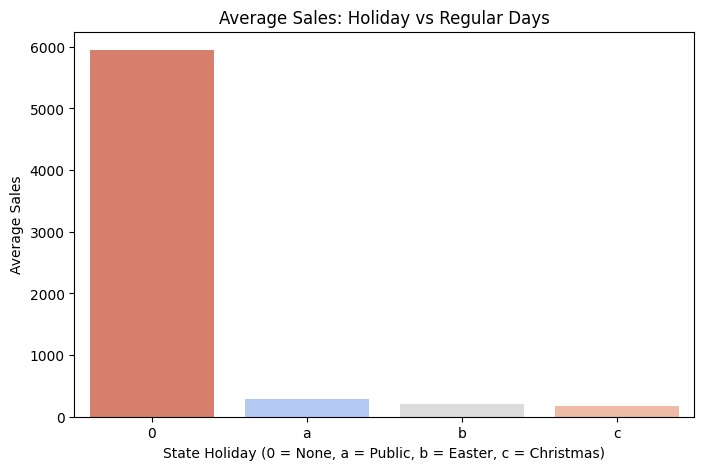

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(x="StateHoliday", y="Sales", data=df, estimator="mean", errorbar=None, palette="coolwarm")
plt.title("Average Sales: Holiday vs Regular Days")
plt.xlabel("State Holiday (0 = None, a = Public, b = Easter, c = Christmas)")
plt.ylabel("Average Sales")
plt.show() #### sales impact: stateholiday vs non-holiday 

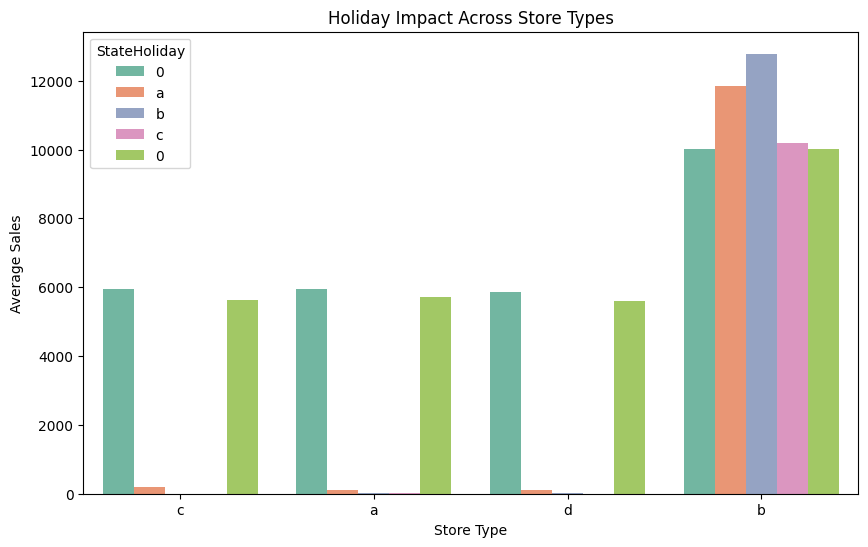

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x="StoreType", y="Sales", hue="StateHoliday", data=df, estimator="mean", errorbar=None, palette="Set2")
plt.title("Holiday Impact Across Store Types")
plt.xlabel("Store Type")
plt.ylabel("Average Sales")
plt.show()##### stateholiday impact across store types 


C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\3546670687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="SchoolHoliday", y="Sales", data=df, estimator="mean", errorbar=None, palette="muted")


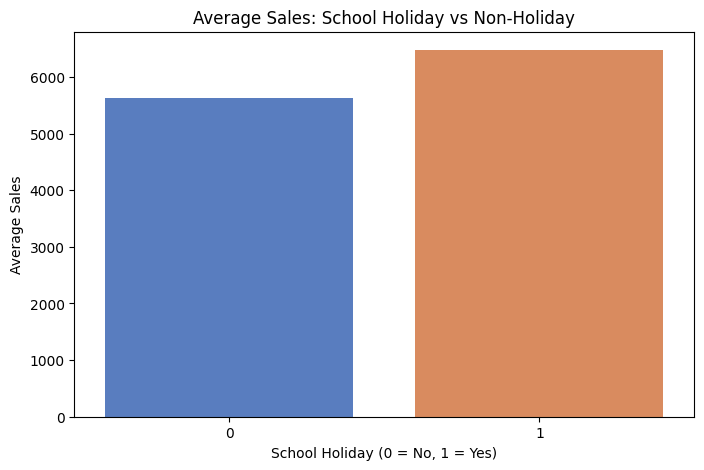

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x="SchoolHoliday", y="Sales", data=df, estimator="mean", errorbar=None, palette="muted")
plt.title("Average Sales: School Holiday vs Non-Holiday")
plt.xlabel("School Holiday (0 = No, 1 = Yes)")
plt.ylabel("Average Sales")
plt.show() ##### sales on schoolholiday vs non-schoolholiday 

# Competition Impact Analysis

In [42]:
 ###  Checking on 
 ### 1. how competition distance affects sales 
 ### 2. impact of competition opening date (recency)
 ### 3. sales trend for stores with vs without nearby competition 

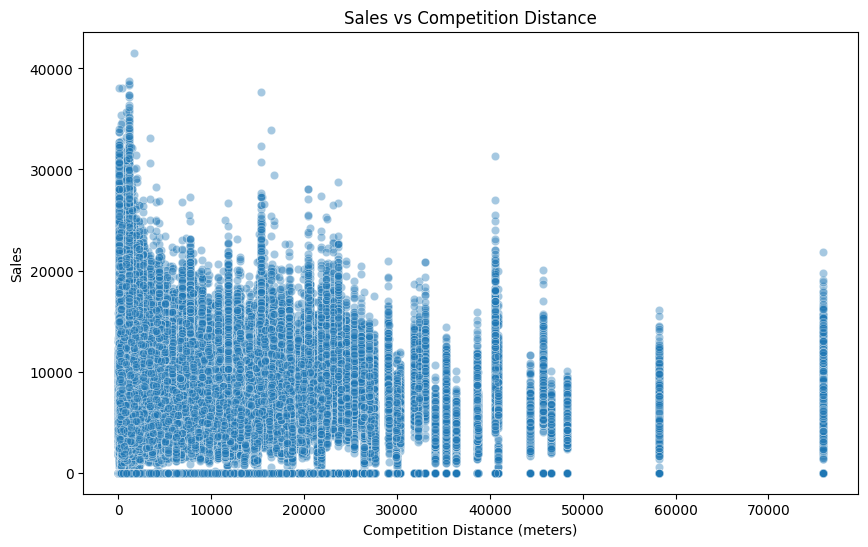

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="CompetitionDistance", y="Sales", data=df, alpha=0.4)
plt.title("Sales vs Competition Distance")
plt.xlabel("Competition Distance (meters)")
plt.ylabel("Sales")
plt.show() #### sales vs competition distance distances by there 

C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\2650460868.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CompDistBin", y="Sales", data=df, estimator="mean", errorbar=None, palette="viridis")


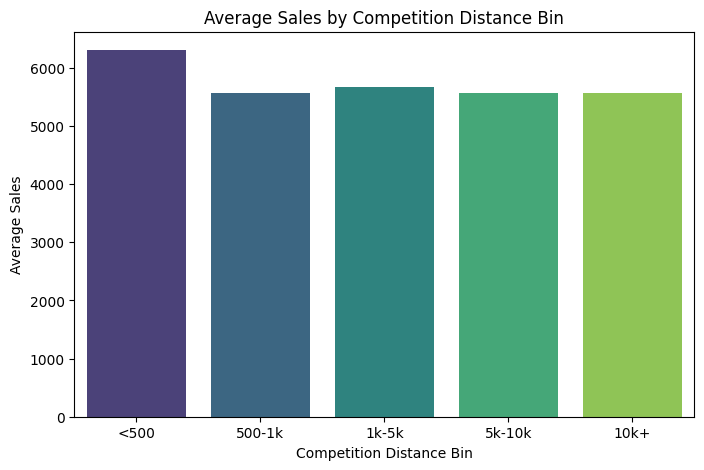

In [44]:
df['CompDistBin'] = pd.cut(df['CompetitionDistance'], bins=[0,500,1000,5000,10000,20000], 
                           labels=["<500","500-1k","1k-5k","5k-10k","10k+"])
plt.figure(figsize=(8,5))
sns.barplot(x="CompDistBin", y="Sales", data=df, estimator="mean", errorbar=None, palette="viridis")
plt.title("Average Sales by Competition Distance Bin")
plt.xlabel("Competition Distance Bin")
plt.ylabel("Average Sales")
plt.show() #### bin competition distance for clearer patterns 

C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\1233401866.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CompetitionOpenSinceYear", y="Sales", data=df, estimator="mean", errorbar=None, palette="coolwarm")


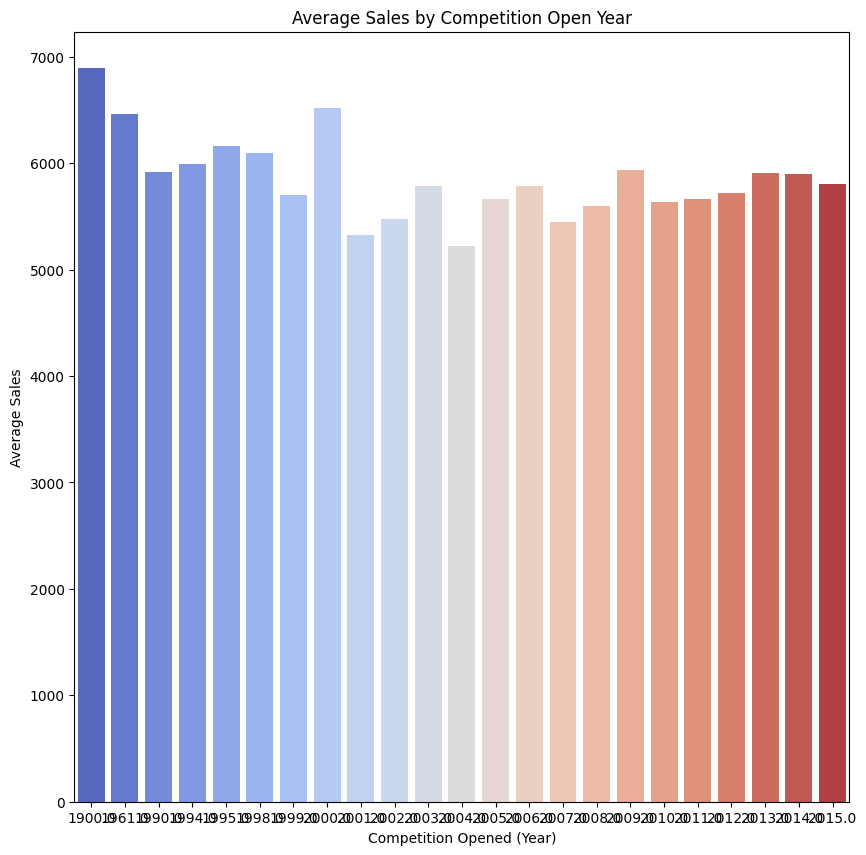

In [46]:
plt.figure(figsize=(10,10))
sns.barplot(x="CompetitionOpenSinceYear", y="Sales", data=df, estimator="mean", errorbar=None, palette="coolwarm")
plt.title("Average Sales by Competition Open Year")
plt.xlabel("Competition Opened (Year)")
plt.ylabel("Average Sales")
plt.show()   #### effects of competition open since year 

C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\3505971038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CompetitionOpenSinceMonth", y="Sales", data=df, estimator="mean", errorbar=None, palette="mako")


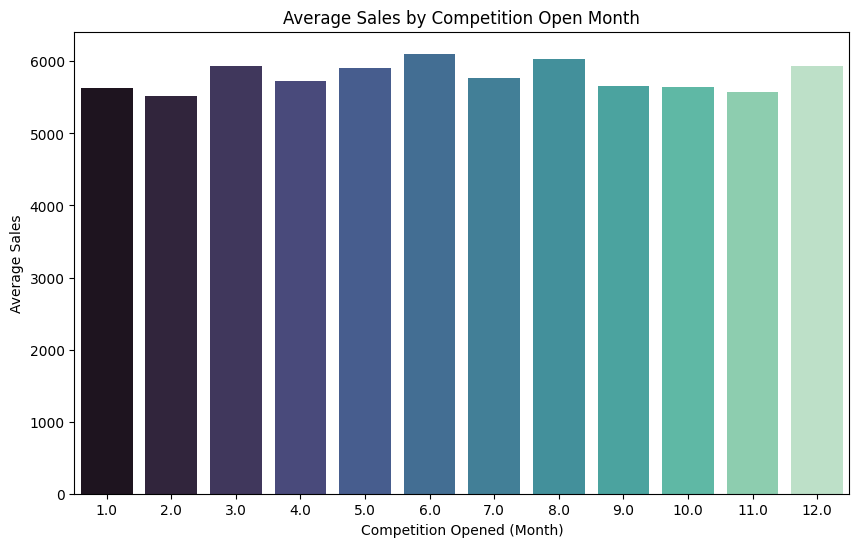

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x="CompetitionOpenSinceMonth", y="Sales", data=df, estimator="mean", errorbar=None, palette="mako")
plt.title("Average Sales by Competition Open Month")
plt.xlabel("Competition Opened (Month)")
plt.ylabel("Average Sales")
plt.show() #### effects of competition open since month 

# Promo2 detailed Impact Analysis 

In [48]:
### Exploring 
### 1. how promo2 vs non-promo2 stores perform 
### 2. impact of promo2sinceweek & promo2sinceyear (early adopters vs late)
### 3. seasonal patterns from promointerval 

C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\3923324468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Promo2", y="Sales", data=df, estimator="mean", errorbar=None, palette="Set2")


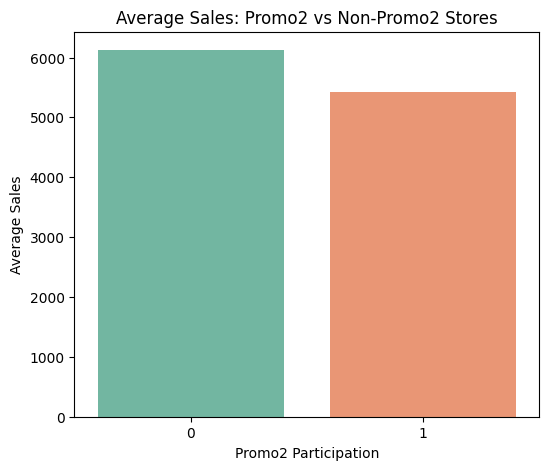

In [49]:
plt.figure(figsize=(6,5))
sns.barplot(x="Promo2", y="Sales", data=df, estimator="mean", errorbar=None, palette="Set2")
plt.title("Average Sales: Promo2 vs Non-Promo2 Stores")
plt.xlabel("Promo2 Participation")
plt.ylabel("Average Sales")
plt.show() ##### promo2 participation analysis 

C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\2070318254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Promo2SinceYear", y="Sales", data=df, estimator="mean", errorbar=None, palette="coolwarm")


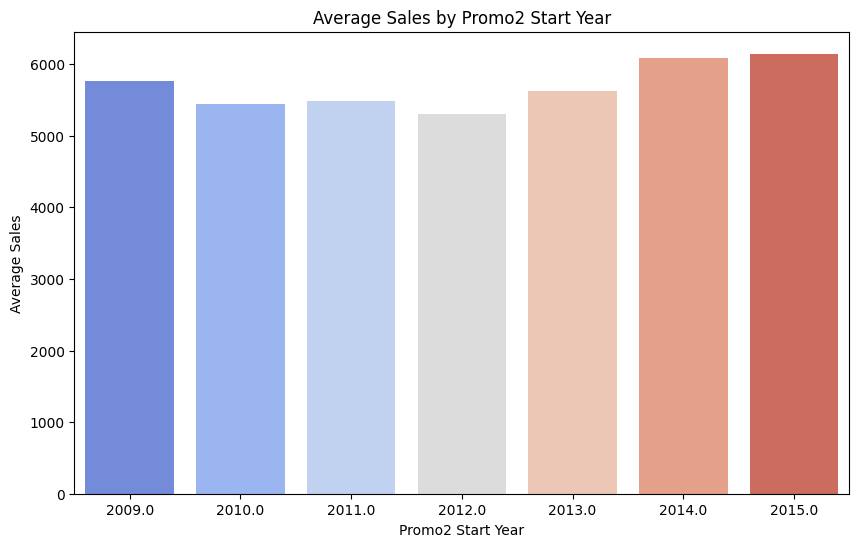

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x="Promo2SinceYear", y="Sales", data=df, estimator="mean", errorbar=None, palette="coolwarm")
plt.title("Average Sales by Promo2 Start Year")
plt.xlabel("Promo2 Start Year")
plt.ylabel("Average Sales")
plt.show() ### promo since year analysis 

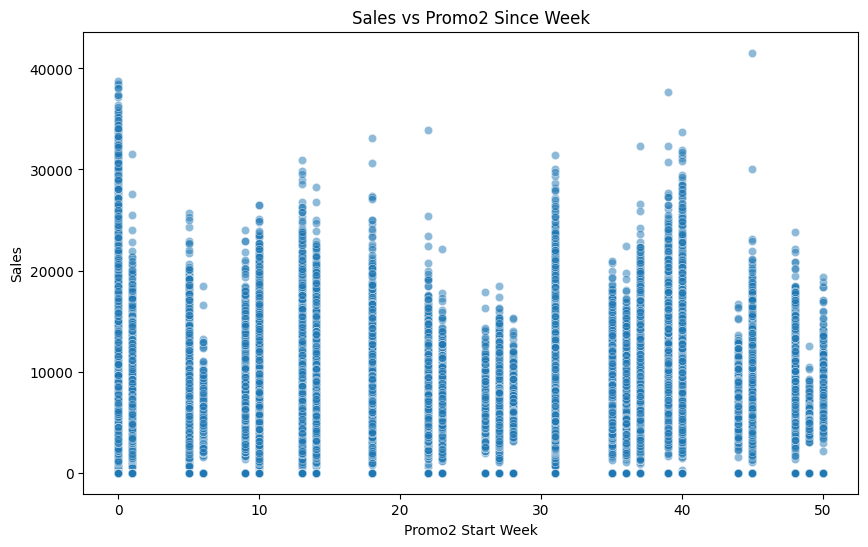

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Promo2SinceWeek", y="Sales", data=df, alpha=0.5)
plt.title("Sales vs Promo2 Since Week")
plt.xlabel("Promo2 Start Week")
plt.ylabel("Sales")
plt.show() #### promo2 since week analysis 

C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\3951869787.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PromoInterval", y="Sales", data=df, estimator="mean", errorbar=None, palette="viridis")


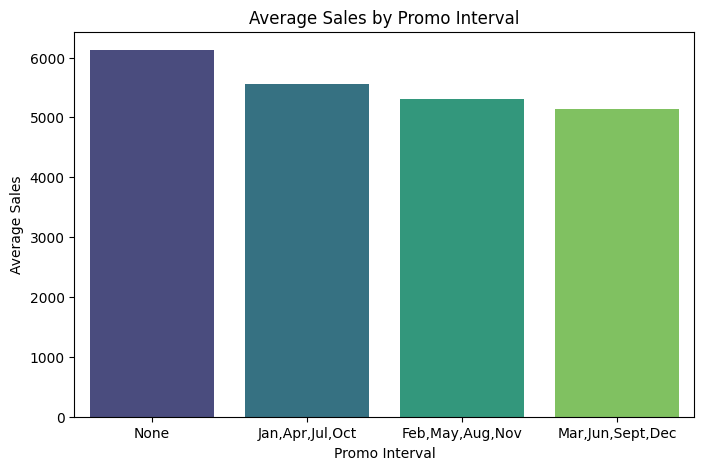

In [52]:
plt.figure(figsize=(8,5))
sns.barplot(x="PromoInterval", y="Sales", data=df, estimator="mean", errorbar=None, palette="viridis")
plt.title("Average Sales by Promo Interval")
plt.xlabel("Promo Interval")
plt.ylabel("Average Sales")
plt.show() ### promo interval (seasonality)

# Store Type & Assortment Strategy Analysis

In [53]:
### Exploring 
### 1. which store type (a,b,c,d) sells best 
### 2. impact of assortment level (basic, extra, extended)
### 3. interaction storetype + assortment + promo 

C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\292997070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="StoreType", y="Sales", data=df, estimator="mean", errorbar=None, palette="Set2")


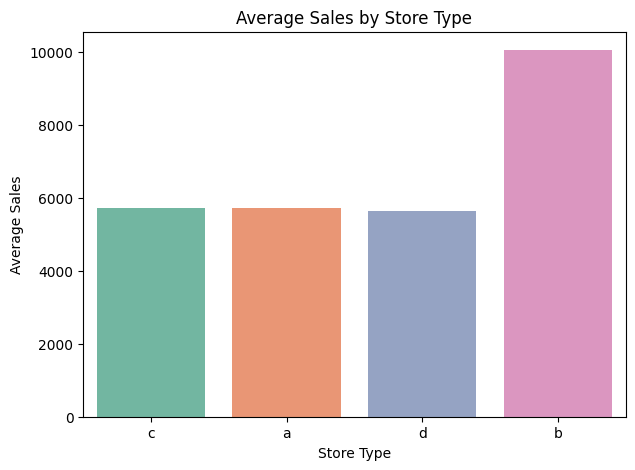

In [54]:
plt.figure(figsize=(7,5))
sns.barplot(x="StoreType", y="Sales", data=df, estimator="mean", errorbar=None, palette="Set2")
plt.title("Average Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Average Sales")
plt.show() ### sales by store type 

C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\2958275705.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Assortment", y="Sales", data=df, estimator="mean", errorbar=None, palette="muted")


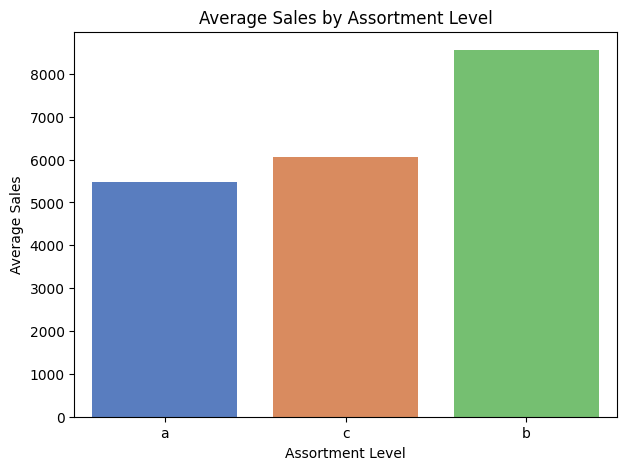

In [55]:
plt.figure(figsize=(7,5))
sns.barplot(x="Assortment", y="Sales", data=df, estimator="mean", errorbar=None, palette="muted")
plt.title("Average Sales by Assortment Level")
plt.xlabel("Assortment Level")
plt.ylabel("Average Sales")
plt.show() ### sales by assortment 

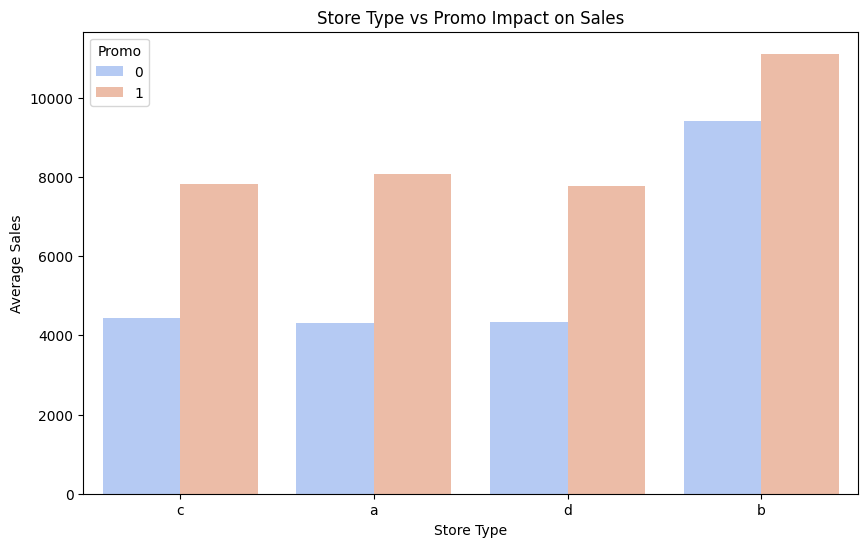

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x="StoreType", y="Sales", hue="Promo", data=df, estimator="mean", errorbar=None, palette="coolwarm")
plt.title("Store Type vs Promo Impact on Sales")
plt.xlabel("Store Type")
plt.ylabel("Average Sales")
plt.legend(title="Promo")
plt.show() ### storetype + promo interaction 

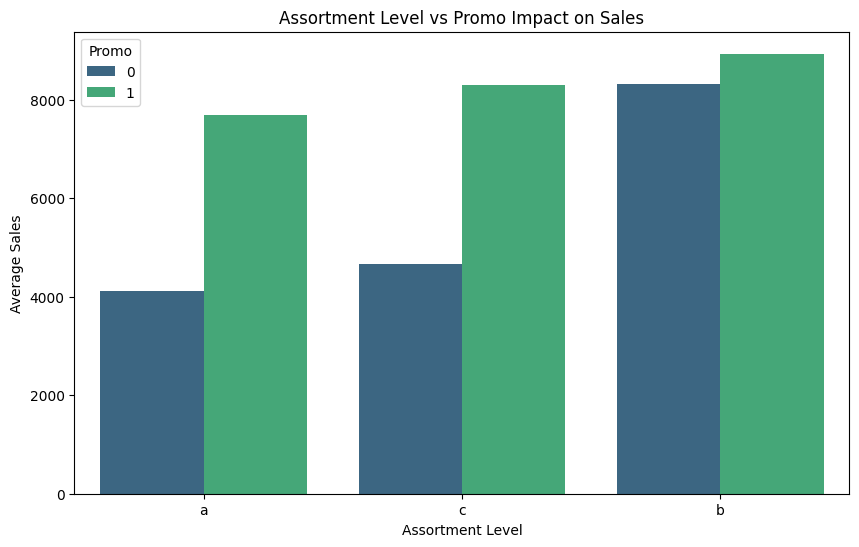

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(x="Assortment", y="Sales", hue="Promo", data=df, estimator="mean", errorbar=None, palette="viridis")
plt.title("Assortment Level vs Promo Impact on Sales")
plt.xlabel("Assortment Level")
plt.ylabel("Average Sales")
plt.legend(title="Promo")
plt.show() ### assortment + promo interaction 

# promo vs non-promo deep dive 

In [58]:
# aggregating sales by promo status i am grrouping sales by promo = 0 vs promo = 1 
promo_sales = df.groupby('Promo')['Sales'].agg(['mean', 'sum', 'count']).reset_index()
promo_sales['avg_per_store'] = promo_sales['sum'] / promo_sales['count']
promo_sales 
### conclusison 
## 1. average sales with and without promo 
## 2. total sales  contributed by promo stores 
## 3. average per store comparison 

,Promo,mean,sum,count,avg_per_store
0,0,4406.050805,2771974337,629129,4406.050805
1,1,7991.152046,3101206286,388080,7991.152046


C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\2910387655.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Promo', y='Sales', data=df, palette='coolwarm')
C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\2910387655.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Promo', y='Sales', data=df, estimator='mean', ci=None, palette='coolwarm')
C:\Users\ganes\AppData\Local\Temp\ipykernel_4672\2910387655.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo', y='Sales', data=df, estimator='mean', ci=None, palette='coolwarm')


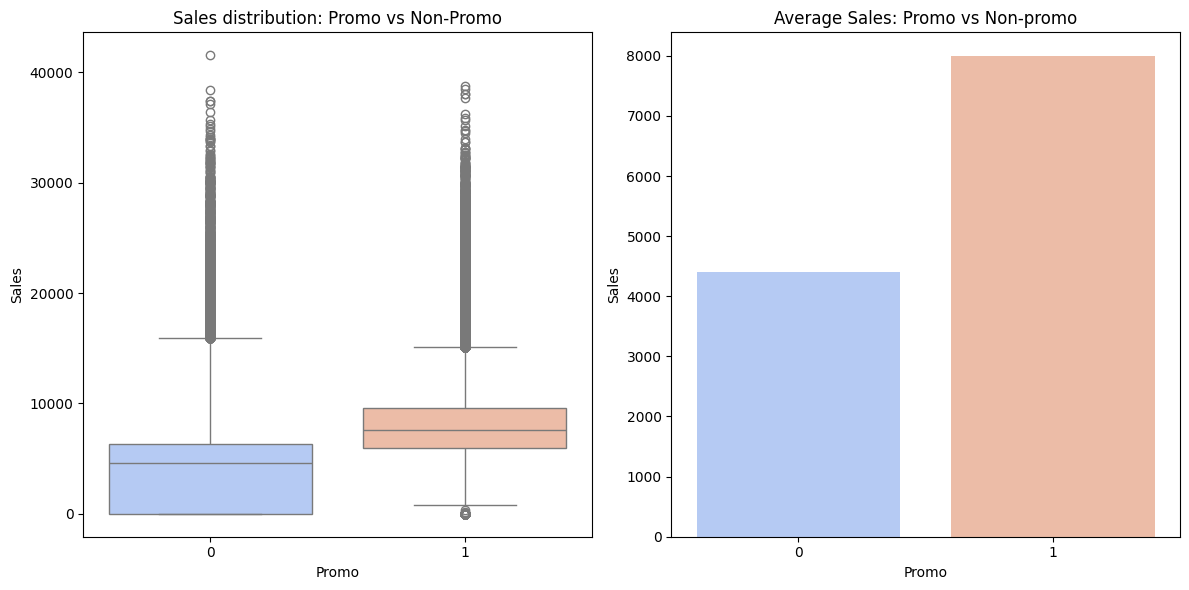

In [60]:
### trying to visualize promo vs non-promo imapct with boxplot + bar chart combo 

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(x='Promo', y='Sales', data=df, palette='coolwarm')
plt.title("Sales distribution: Promo vs Non-Promo") ### boxplot for distribution 

plt.subplot(1,2,2)
sns.barplot(x='Promo', y='Sales', data=df, estimator='mean', ci=None, palette='coolwarm')
plt.title("Average Sales: Promo vs Non-promo") ##### barplot for average comparison 

plt.tight_layout()
plt.show()

## time series angle 

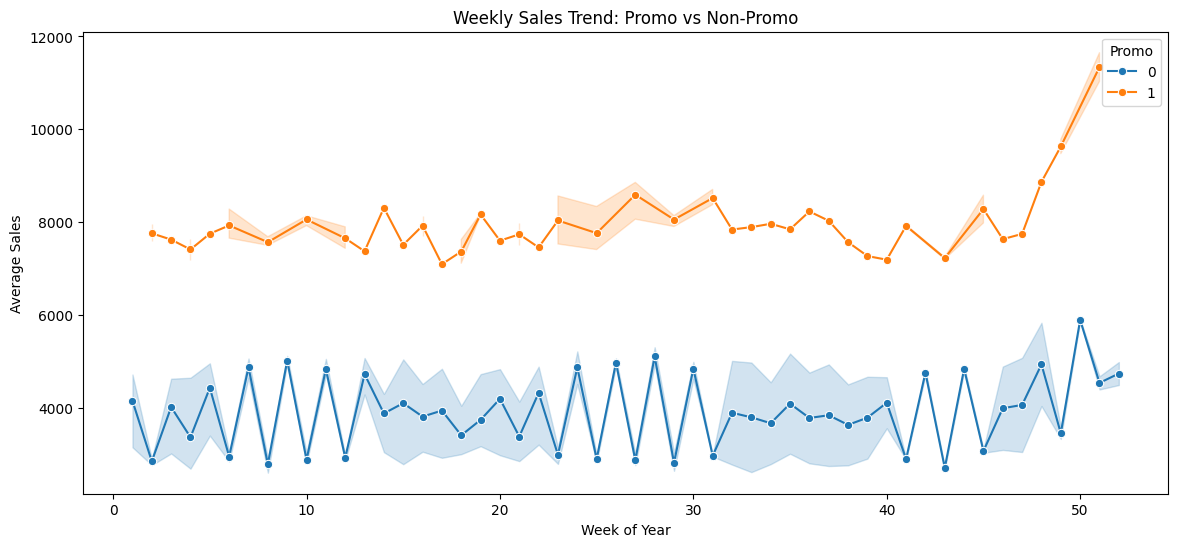

In [63]:
df['Date'] = pd.to_datetime(df['Date'])


df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week




#### comparing weekly avg sales with vs without promo 
weekly_promo = df.groupby(['Year', 'Week', 'Promo'])['Sales'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(x='Week', y='Sales', hue='Promo', data=weekly_promo, marker='o')
plt.title("Weekly Sales Trend: Promo vs Non-Promo")
plt.xlabel("Week of Year")
plt.ylabel("Average Sales")
plt.show()